<a href="https://colab.research.google.com/github/kenanmorani/pattern_recognition_idu/blob/main/Clustering_toy_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* The following code includes clustering algorithms, which should work for different cluster numbers (k), for 2-dimensional data in the clustering_toy_data.csv.
* The verifying dataset 'clustering_toy_data.csv' is cloned from github.
* The code includes comments on the results.

In [27]:
import numpy as np 
import pandas as pd 
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist
from matplotlib import pyplot as plt
from scipy.spatial import distance
import math
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  

In [28]:
!git clone https://github.com/kenanmorani/pattern_recognition_idu

fatal: destination path 'pattern_recognition_idu' already exists and is not an empty directory.


In [29]:
# Reading the dataset 
df = pd.read_csv('/content/pattern_recognition_idu/data/clustering_toy_data.csv')

In [30]:
# Exploring the dataset
df.head()

,x,y
0,-0.200303,0.510281
1,-0.326642,-0.922599
2,-0.020885,-1.822650
3,-0.796312,0.618746
4,-1.290430,-1.055020


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       100 non-null    float64
 1   y       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


### K-means Clustering


In [32]:
def avg(cluster):
    if len(cluster) < 0:
        return
    current_sum = cluster[0]
    for i in range(1,len(cluster)):
        current_sum = np.add(current_sum , cluster[i])
    # Dividing by total samples
    for k in range(len(current_sum)):
        current_sum[k]  = current_sum[k]/len(cluster)
    return current_sum

In [33]:
def mean_distance(clusters ,cluster_num):
    print('first cluster | ','second cluster | ', 'distance')
    while len(clusters) is not cluster_num:
        # Clustering           (
        closest_distance=clust_1=clust_2 = math.inf

        for cluster_id, cluster in enumerate(clusters[:len(clusters)]): 
            cluster_avg = avg(cluster)
            for cluster2_id, cluster2 in enumerate(clusters[(cluster_id+1):]): 
                cluster2_avg = avg (cluster2)
                if distance.euclidean(cluster_avg,cluster2_avg) < closest_distance:
                    closest_distance = distance.euclidean(cluster_avg,cluster2_avg)
                    clust_1 = cluster_id
                    clust_2 = cluster2_id+cluster_id+1
        print(clust_1,' | ',clust_2, ' | ',closest_distance)
        clusters[clust_1].extend(clusters[clust_2]) 
        clusters.pop(clust_2) 
    return(clusters)

In [34]:
def hierarchical(data, cluster_num, metric = 'mean'):
    # At first each point is considered a cluster
    init_clusters=[]
    for index, row in data.iterrows():
        init_clusters.append([[row['x'], row['y']]])
    if metric is 'mean':
        return mean_distance(init_clusters, cluster_num)

first cluster |  second cluster |  distance
52  |  82  |  0.020905188351220523
55  |  73  |  0.05421475813835223
77  |  93  |  0.059082417858446014
57  |  94  |  0.06269623274168862
59  |  72  |  0.0729949621549323
54  |  65  |  0.08752271076697725
76  |  79  |  0.08889486486856268
76  |  92  |  0.08436373065482534
60  |  78  |  0.10694767692661643
56  |  58  |  0.11503641597337791
58  |  85  |  0.11842380007836234
80  |  85  |  0.12028533160780673
26  |  47  |  0.12849902295348342
36  |  46  |  0.1463166747161786
73  |  82  |  0.1476916935902478
63  |  75  |  0.1499040509792851
61  |  70  |  0.15135927358440904
60  |  82  |  0.1541678890041632
69  |  71  |  0.16187268183668346
56  |  69  |  0.15681864996797307
49  |  78  |  0.16309363322950393
50  |  51  |  0.17076569656989113
32  |  36  |  0.1718011842945215
40  |  41  |  0.17227460304989806
52  |  63  |  0.17264172438897785
56  |  70  |  0.1823624836692019
53  |  54  |  0.19703632527475184
1  |  12  |  0.2024765654020238
37  |  44  

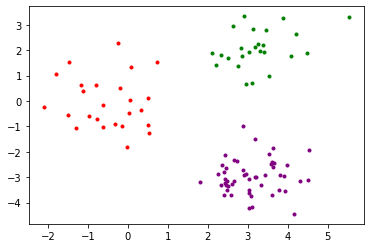

In [35]:
#For k=3
clusters = hierarchical(df,3)
colors = ['red', 'green', 'purple']
for cluster_index, cluster in enumerate(clusters):
    for point_index, point in enumerate(cluster):
        plt.plot([point[0]], [point[1]], marker='o', markersize=3, color=colors[cluster_index])

* For k=3 the colored clusters show how the k-means algorithms grouped the scattered points.

first cluster |  second cluster |  distance
52  |  82  |  0.020905188351220523
55  |  73  |  0.05421475813835223
77  |  93  |  0.059082417858446014
57  |  94  |  0.06269623274168862
59  |  72  |  0.0729949621549323
54  |  65  |  0.08752271076697725
76  |  79  |  0.08889486486856268
76  |  92  |  0.08436373065482534
60  |  78  |  0.10694767692661643
56  |  58  |  0.11503641597337791
58  |  85  |  0.11842380007836234
80  |  85  |  0.12028533160780673
26  |  47  |  0.12849902295348342
36  |  46  |  0.1463166747161786
73  |  82  |  0.1476916935902478
63  |  75  |  0.1499040509792851
61  |  70  |  0.15135927358440904
60  |  82  |  0.1541678890041632
69  |  71  |  0.16187268183668346
56  |  69  |  0.15681864996797307
49  |  78  |  0.16309363322950393
50  |  51  |  0.17076569656989113
32  |  36  |  0.1718011842945215
40  |  41  |  0.17227460304989806
52  |  63  |  0.17264172438897785
56  |  70  |  0.1823624836692019
53  |  54  |  0.19703632527475184
1  |  12  |  0.2024765654020238
37  |  44  

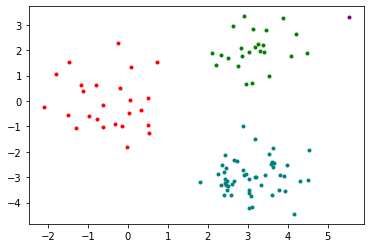

In [37]:
#For k=4
clusters = hierarchical(df,4)
colors = ['red', 'green', 'purple', 'teal']
for cluster_index, cluster in enumerate(clusters):
    for point_index, point in enumerate(cluster):
        plt.plot([point[0]], [point[1]], marker='o', markersize=3, color=colors[cluster_index])

* For k=4, the colored clusters show grouping of four clusters. The purple cluster was taken to be only one point as in the scattered plot.

* K means is an iterative clustering algorithm that aims to find local maxima in each iteration.
* In K Means clustering, since we start with random choice of clusters, the results produced by running the algorithm multiple times might differ.
* The results show tighter clusters comparing to hierarical methods and K-means clustering works better with big datasets.
* Hierarchical clustering can’t handle big data well but K Means clustering can. This is because the time complexity of K Means is linear i.e. O(n) while that of hierarchical clustering is quadratic i.e. O(n2).
* K Means clustering requires prior knowledge of K i.e. no. of clusters you want to divide your data into. In our case the number was 3 and 4.

### Single Linkage Algorithm

The single linkage algorithms measures the shortest link.

In [38]:
def single_distance(clusters ,cluster_num):
    print('first cluster | ','second cluster | ', 'distance')
    while len(clusters) is not cluster_num:
        # Clustering           (
        closest_distance=clust_1=clust_2 = math.inf
        for cluster_id, cluster in enumerate(clusters[:len(clusters)]): 
            # for every point in every cluster
            for point_id,point in enumerate(cluster): 
                # Comparing with clusters after the current one
                for cluster2_id, cluster2 in enumerate(clusters[(cluster_id+1):]): 
                    # Going through each point in this prospective cluster
                    for point2_id, point2 in enumerate(cluster2):
# If the new distance is prefered to the previous one, then we keep it
                        if distance.euclidean(point,point2) < closest_distance: 
                            # Only used for comparing 
                            closest_distance = distance.euclidean(point,point2)
                # At the end of the process, this is to tell with clusters will be merged
                            clust_1 = cluster_id
                # This cluster will be deleted in the end
                            clust_2 = cluster2_id+cluster_id+1
               # extending by appending the contents to the list without flattening it out
        print(clust_1,' | ',clust_2, ' | ',closest_distance)
        clusters[clust_1].extend(clusters[clust_2]) 
        # don't need this index anymore, and we have just clustered once more
        clusters.pop(clust_2) 
    return(clusters)

In [39]:
# Hierarchical clustering
def hierarchical(data, cluster_num, metric = 'single'):
    # initialization of clusters at first (every point is a cluster)
    init_clusters=[]
    for index, row in data.iterrows():
        init_clusters.append([[row['x'], row['y']]])
    if metric is 'single':
        return single_distance(init_clusters, cluster_num)

first cluster |  second cluster |  distance
52  |  82  |  0.020905188351220523
55  |  73  |  0.05421475813835223
77  |  93  |  0.059082417858446014
57  |  94  |  0.06269623274168862
59  |  72  |  0.0729949621549323
59  |  76  |  0.08613443678343743
54  |  65  |  0.08752271076697725
75  |  78  |  0.08889486486856268
75  |  91  |  0.09059333860720648
59  |  86  |  0.0907784082257447
60  |  77  |  0.10694767692661643
56  |  58  |  0.11503641597337791
79  |  84  |  0.12028533160780673
58  |  59  |  0.1221576948047074
58  |  70  |  0.12478038026869437
72  |  81  |  0.12671008168255596
60  |  77  |  0.1270629312584906
26  |  47  |  0.12849902295348342
36  |  46  |  0.1463166747161786
62  |  72  |  0.1499040509792851
60  |  68  |  0.15135927358440904
59  |  78  |  0.1541678890041632
32  |  36  |  0.1550140445250043
55  |  62  |  0.1566030156159195
54  |  63  |  0.1577377855810075
49  |  50  |  0.160699322960615
48  |  72  |  0.16309363322950393
40  |  41  |  0.17227460304989806
47  |  59  |  

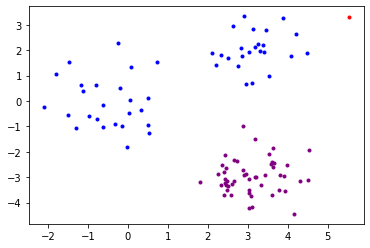

In [40]:
# For k=3
clusters = hierarchical(df,3)
colors = ['blue', 'red', 'purple']
for cluster_index, cluster in enumerate(clusters):
    for point_index, point in enumerate(cluster):
        plt.plot([point[0]], [point[1]], marker='o', markersize=3, color=colors[cluster_index])

* For k=3 the colored clusters show the results above where only one point was considered a red cluster.

first cluster |  second cluster |  distance
52  |  82  |  0.020905188351220523
55  |  73  |  0.05421475813835223
77  |  93  |  0.059082417858446014
57  |  94  |  0.06269623274168862
59  |  72  |  0.0729949621549323
59  |  76  |  0.08613443678343743
54  |  65  |  0.08752271076697725
75  |  78  |  0.08889486486856268
75  |  91  |  0.09059333860720648
59  |  86  |  0.0907784082257447
60  |  77  |  0.10694767692661643
56  |  58  |  0.11503641597337791
79  |  84  |  0.12028533160780673
58  |  59  |  0.1221576948047074
58  |  70  |  0.12478038026869437
72  |  81  |  0.12671008168255596
60  |  77  |  0.1270629312584906
26  |  47  |  0.12849902295348342
36  |  46  |  0.1463166747161786
62  |  72  |  0.1499040509792851
60  |  68  |  0.15135927358440904
59  |  78  |  0.1541678890041632
32  |  36  |  0.1550140445250043
55  |  62  |  0.1566030156159195
54  |  63  |  0.1577377855810075
49  |  50  |  0.160699322960615
48  |  72  |  0.16309363322950393
40  |  41  |  0.17227460304989806
47  |  59  |  

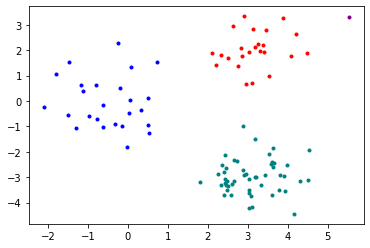

In [20]:
# For k=4
clusters = hierarchical(df,4)
colors = ['blue', 'red', 'purple', 'teal']
for cluster_index, cluster in enumerate(clusters):
    for point_index, point in enumerate(cluster):
        plt.plot([point[0]], [point[1]], marker='o', markersize=3, color=colors[cluster_index])

* For k=4, the algorithm decided to have one purple point in one cluster. 

* From the results above, we can observe the monotonic increase of the distance. 
* The method groups clusters in bottom-up fashion (agglomerative clustering). At each step it combines two clusters that contain the closest pair of elements, not yet belonging to the same cluster as each other.
* The results produced have long thin clusters; i.e. nearby elements of the same cluster have small distances, but elements at opposite ends of a cluster may be much farther from each other than two elements of other clusters. This may lead to difficulties in defining classes that could subdivide the data.

### Complete Linkage Algorithm

In [22]:
def complete_distance(clusters ,cluster_num):
    print('first cluster | ','second cluster | ', 'distance')
    while len(clusters) is not cluster_num:
        # Clustering           (
        closest_distance=clust_1=clust_2 = math.inf
        # for every cluster (until second last element)
        for cluster_id, cluster in enumerate(clusters[:len(clusters)]): 
            for cluster2_id, cluster2 in enumerate(clusters[(cluster_id+1):]):  
                furthest_cluster_dist = -1
                # Unlike single linkage, in complexte linkage algorithm, we try to minimize the max distance between clusters
                # Going through each point in this prospective cluster as well
                for point_id,point in enumerate(cluster): 
                    for point2_id, point2 in enumerate(cluster2):
                        # making sure that our farthest distance is the maximum distance betweeen the clusters at hand
                        if furthest_cluster_dist < distance.euclidean(point,point2): 
                            furthest_cluster_dist = distance.euclidean(point,point2)
                # minimizing the above farthest dist
                if furthest_cluster_dist < closest_distance:
                    closest_distance = furthest_cluster_dist
                    clust_1 = cluster_id
                    clust_2 = cluster2_id+cluster_id+1
               # extending by appending the contents to the list without flattening it out
        print(clust_1,' | ',clust_2, ' | ',closest_distance)
        clusters[clust_1].extend(clusters[clust_2]) 
        # don't need this index anymore, and we have just clustered once more
        clusters.pop(clust_2) 
    return(clusters)

In [24]:
# Hierarchical clustering
def hierarchical(data, cluster_num, metric = 'complete'):
    init_clusters=[]
    for index, row in data.iterrows():
        init_clusters.append([[row['x'], row['y']]])
    if metric is 'complete':
        return complete_distance(init_clusters, cluster_num)

first cluster |  second cluster |  distance
52  |  82  |  0.020905188351220523
55  |  73  |  0.05421475813835223
77  |  93  |  0.059082417858446014
57  |  94  |  0.06269623274168862
59  |  72  |  0.0729949621549323
54  |  65  |  0.08752271076697725
76  |  79  |  0.08889486486856268
76  |  92  |  0.09989231001433466
60  |  78  |  0.10694767692661643
56  |  58  |  0.11503641597337791
80  |  86  |  0.12028533160780673
26  |  47  |  0.12849902295348342
36  |  46  |  0.1463166747161786
63  |  75  |  0.1499040509792851
56  |  82  |  0.14990598954011114
61  |  70  |  0.15135927358440904
60  |  83  |  0.1541678890041632
49  |  81  |  0.16309363322950393
41  |  42  |  0.17227460304989806
49  |  50  |  0.18087588921688835
62  |  69  |  0.1814888404282755
53  |  64  |  0.19155816296884837
1  |  12  |  0.2024765654020238
67  |  75  |  0.20365677057245088
38  |  45  |  0.20710485580980503
31  |  35  |  0.21379014126006898
62  |  70  |  0.22211885309446458
34  |  38  |  0.22822771632735545
5  |  23 

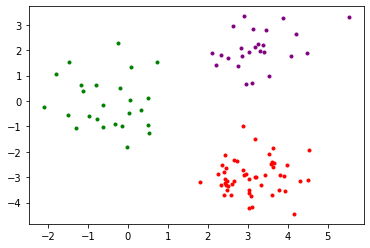

In [25]:
# For k=3
clusters = hierarchical(df,3)
colors = ['green', 'purple', 'red']
for cluster_index, cluster in enumerate(clusters):
    for point_index, point in enumerate(cluster):
        plt.plot([point[0]], [point[1]], marker='o', markersize=3, color=colors[cluster_index])

* For k=3, the results show the colored clusters above. 
* Comparing to single linkage algorithm for k=3, the results here have no one sinlge dot for the same dataset and the same number of clusters, instead groups were joined together in more scattered dots.

first cluster |  second cluster |  distance
52  |  82  |  0.020905188351220523
55  |  73  |  0.05421475813835223
77  |  93  |  0.059082417858446014
57  |  94  |  0.06269623274168862
59  |  72  |  0.0729949621549323
54  |  65  |  0.08752271076697725
76  |  79  |  0.08889486486856268
76  |  92  |  0.09989231001433466
60  |  78  |  0.10694767692661643
56  |  58  |  0.11503641597337791
80  |  86  |  0.12028533160780673
26  |  47  |  0.12849902295348342
36  |  46  |  0.1463166747161786
63  |  75  |  0.1499040509792851
56  |  82  |  0.14990598954011114
61  |  70  |  0.15135927358440904
60  |  83  |  0.1541678890041632
49  |  81  |  0.16309363322950393
41  |  42  |  0.17227460304989806
49  |  50  |  0.18087588921688835
62  |  69  |  0.1814888404282755
53  |  64  |  0.19155816296884837
1  |  12  |  0.2024765654020238
67  |  75  |  0.20365677057245088
38  |  45  |  0.20710485580980503
31  |  35  |  0.21379014126006898
62  |  70  |  0.22211885309446458
34  |  38  |  0.22822771632735545
5  |  23 

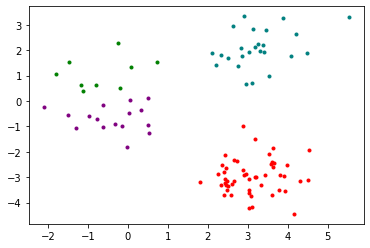

In [26]:
# For k=4
clusters = hierarchical(df,4)
colors = ['green', 'purple', 'teal', 'red']
for cluster_index, cluster in enumerate(clusters):
    for point_index, point in enumerate(cluster):
        plt.plot([point[0]], [point[1]], marker='o', markersize=3, color=colors[cluster_index])

* For k=4, the complete linkage cluster, grouped the data differently comparing to single linkage with the same number of clusters. Instead of having one point to be considered as one cluster, the algorithm here decided to have groups of more points in one cluster and take a division in a more closely packed points,purple and green points.

* The results show increase in the distance.
* Complete Like linkage clustering, this method is also agglomerative hierarchical clustering. 
* In contrast, for complete linkage, the distance is between the observations that are furthest apart.
* This complete-link merge criterion is non-local; the entire structure of the clustering can influence merge decisions. This results favor compact clusters with small diameters over long, straggly clusters. That is why the results in here are smaller or tighter clusters comparing to single-linkage algorithm.

#References
1. https://tarunsunkaraneni.github.io/
2. https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html
3. Nielsen, Frank. "Hierarchical clustering." Introduction to HPC with MPI for Data Science. Springer, Cham, 2016. 195-211.
4. Moore, Andrew. "K-means and Hierarchical Clustering." (2001).
5. Camiz, S., and V. Pillar. "Comparison of single and complete linkage clustering with the hierarchical factor classification of variables." Community Ecology 8.1 (2007): 25-30.                     
6. https://towardsdatascience.com/introduction-hierarchical-clustering-d3066c6b560e
7. Kodinariya, Trupti M., and Prashant R. Makwana. "Review on determining number of Cluster in K-Means Clustering." International Journal 1.6 (2013): 90-95.
8. https://www.kaggle.com/barelydedicated/hierarchical-clustering-single-link
9. https://www.kaggle.com/barelydedicated/hierarchical-clustering-complete-link
10. De Hoon, Michiel JL, et al. "Open source clustering software." Bioinformatics 20.9 (2004): 1453-1454.


